<a href="https://colab.research.google.com/github/Thanvitha/gis/blob/main/ps3_thanvitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIS PROJECT


The primary objective of this project is to analyze and compare CYBER CRIMES ,SUICIDE RATE and UNEMPLOYMENT STATUS across different states of India.

In [17]:
!pip install mapclassify
!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import mapclassify
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import calendar
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [18]:
! wget -q -O india_map.zip https://docs.google.com/uc?id=1Sk3Y809VU07WGHoV380T9US57-41wdfH&export=download
zip_ref = zipfile.ZipFile('india_map.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Ind = gpd.read_file('output.shp')

In [19]:
# Removing NA values
l1 = list(Ind.isna().sum())
for i in range(len(l1)):
  if l1[i] != 0:
    print("Col name: ",Ind.columns[i],"\tTotal Counts: ",l1[i])
    Ind[f'{Ind.columns[i]}'].fillna(Ind[f'{Ind.columns[i]}'].mean(),inplace=True)

Col name:  distarea 	Total Counts:  64
Col name:  totalpopul 	Total Counts:  33
Col name:  totalhh 	Total Counts:  33
Col name:  totpopmale 	Total Counts:  33
Col name:  totpopfema 	Total Counts:  33


<Axes: >

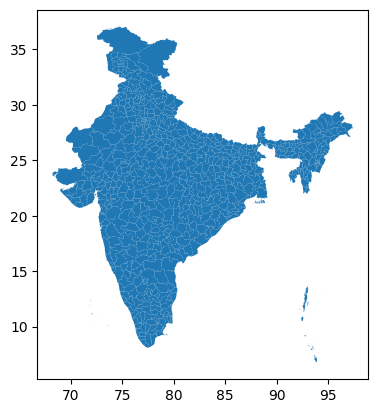

In [20]:
Ind.plot()

In [21]:
states = Ind.dissolve(by='statename',aggfunc='sum').reset_index()
states = states[['statename', 'distarea', 'totalpopul','totpopmale', 'totpopfema', 'geometry']]
states['statename'] = states['statename'].str.upper()

<ipython-input-21-a078edf64242>:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  states = Ind.dissolve(by='statename',aggfunc='sum').reset_index()


<Axes: >

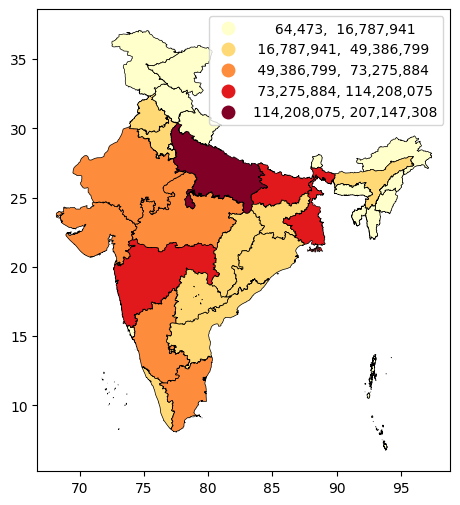

In [22]:
states.plot(figsize=(8,6),column='totalpopul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})

#Cyber Crimes

In [23]:
ind_df = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/cyber_crime.xlsx')

In [24]:
pd.set_option('display.max_columns', None)
ind_df.head(10)

,S. No,Category,State/UT,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Political Motives,Terrorist Activities (Total),Terrorist Activities - Terrorist Recruitment,Terrorist Activities - Terrorist Funding,Terrorist Activities - Others,Inciting Hate against Country,Disrupt Public Service,Sale Purchase Illegal Drugs,Developing own Business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total,Year
0,1,State,Andhra Pradesh,24.0,5.0,537.0,65.0,0.0,0.0,61.0,12.0,8.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,931.0,2017
1,2,State,Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2017
2,3,State,Assam,246.0,83.0,48.0,65.0,40.0,40.0,217.0,10.0,44.0,0.0,0.0,44.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,322.0,1120.0,2017
3,4,State,Bihar,12.0,5.0,397.0,3.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433.0,2017
4,5,State,Chhattisgarh,8.0,3.0,47.0,4.0,29.0,18.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,171.0,2017
5,6,State,Goa,0.0,0.0,8.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,2017
6,7,State,Gujarat,6.0,5.0,305.0,12.0,79.0,3.0,24.0,4.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,458.0,2017
7,8,State,Haryana,7.0,6.0,43.0,4.0,9.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,4.0,0.0,1.0,0.0,382.0,504.0,2017
8,9,State,Himachal Pradesh,5.0,4.0,8.0,6.0,3.0,3.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,9.0,56.0,2017
9,10,State,Jammu & Kashmir,0.0,1.0,15.0,10.0,0.0,3.0,7.0,0.0,3.0,0.0,0.0,3.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,63.0,2017


In [25]:
ind_df.columns=ind_df.columns.str.lower()
ind_df.columns = ind_df.columns.str.replace(' ', '_', 1)

In [26]:
ind_df=ind_df.rename(columns={'s._no':'s_no',
                             'anger_':'anger',
                             'fraud_':'fraud',
                              'terrorist_activities - terrorist recruitment':'terror_recruit',
                              'terrorist_activities - terrorist funding':'terror_funding',
                              'terrorist_activities - others':'terror_activities_others',
                              'terrorist_activities (total)':'terror_activities_total',
                              'inciting_hate against country':'inciting_hate_against_country',
                              'disrupt_public service':'disrupt_public_service',
                              'sale_purchase illegal drugs':'sale_purchase_illegal_drugs',
                              'developing_own business':'developing_own_business',
                              'psycho_or pervert ':'psycho_or_pervert',
                              'steal_information ':'steal_information',
                              'abetment_to suicide':'abetment_to_suicide',
                              'other_':'other_','total_':'total','extortion_':'extortion',
                              'prank_':'prank','others_':'others'})

In [27]:
ind_df.isnull().sum()

s_no                             1
category                         1
state/ut                         1
personal_revenge                 1
anger                            1
fraud                            1
extortion                        1
causing_disrepute                1
prank                            1
sexual_exploitation              1
political_motives                1
terror_activities_total          1
terror_recruit                   1
terror_funding                   1
terror_activities_others         1
inciting_hate_against_country    1
disrupt_public_service           1
sale_purchase_illegal_drugs      1
developing_own_business          1
spreading_piracy                 1
psycho_or_pervert                1
steal_information                1
abetment_to_suicide              1
others                           1
total                            1
year                             0
dtype: int64

In [28]:
ind_df=ind_df.dropna()

In [29]:
ind_df.describe()

,personal_revenge,anger,fraud,extortion,causing_disrepute,prank,sexual_exploitation,political_motives,terror_activities_total,terror_recruit,terror_funding,terror_activities_others,inciting_hate_against_country,disrupt_public_service,sale_purchase_illegal_drugs,developing_own_business,spreading_piracy,psycho_or_pervert,steal_information,abetment_to_suicide,others,total,year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.826923,49.576923,1621.096154,119.961538,111.423077,43.384615,174.019231,19.788462,8.961538,0.346154,0.0,8.615385,12.269231,3.769231,0.865385,14.326923,16.942308,0.423077,3.480769,0.134615,482.769231,2762.019231,2018.500000
std,245.026902,147.462189,5067.858616,380.311738,337.920033,193.481497,519.774498,60.932539,30.706075,1.435287,0.0,29.726378,39.425118,12.771362,3.077675,40.864870,90.375649,2.094658,14.615710,0.728113,1496.216829,8406.686061,1.121635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.500000,2017.750000
50%,5.500000,3.500000,52.000000,10.500000,4.000000,1.000000,22.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.500000,233.500000,2018.500000
75%,27.250000,17.250000,511.750000,31.500000,36.250000,6.000000,70.000000,9.000000,1.000000,0.000000,0.0,1.000000,3.000000,1.000000,0.000000,6.250000,2.000000,0.000000,0.000000,0.000000,192.250000,1108.000000,2019.250000
max,1470.000000,822.000000,30142.000000,2440.000000,1874.000000,1385.000000,3293.000000,356.000000,199.000000,8.000000,0.0,191.000000,218.000000,92.000000,21.000000,210.000000,671.000000,17.000000,93.000000,5.000000,8814.000000,50035.000000,2020.000000


In [30]:
ind_df.rename(columns={"state/ut": "st_nm"}, inplace=True)

In [31]:
ind_df.head(38)

,s_no,category,st_nm,personal_revenge,anger,fraud,extortion,causing_disrepute,prank,sexual_exploitation,political_motives,terror_activities_total,terror_recruit,terror_funding,terror_activities_others,inciting_hate_against_country,disrupt_public_service,sale_purchase_illegal_drugs,developing_own_business,spreading_piracy,psycho_or_pervert,steal_information,abetment_to_suicide,others,total,year
0,1,State,Andhra Pradesh,24.0,5.0,537.0,65.0,0.0,0.0,61.0,12.0,8.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,931.0,2017
1,2,State,Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2017
2,3,State,Assam,246.0,83.0,48.0,65.0,40.0,40.0,217.0,10.0,44.0,0.0,0.0,44.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,322.0,1120.0,2017
3,4,State,Bihar,12.0,5.0,397.0,3.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433.0,2017
4,5,State,Chhattisgarh,8.0,3.0,47.0,4.0,29.0,18.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,171.0,2017
5,6,State,Goa,0.0,0.0,8.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,2017
6,7,State,Gujarat,6.0,5.0,305.0,12.0,79.0,3.0,24.0,4.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,458.0,2017
7,8,State,Haryana,7.0,6.0,43.0,4.0,9.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,4.0,0.0,1.0,0.0,382.0,504.0,2017
8,9,State,Himachal Pradesh,5.0,4.0,8.0,6.0,3.0,3.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,9.0,56.0,2017
9,10,State,Jammu & Kashmir,0.0,1.0,15.0,10.0,0.0,3.0,7.0,0.0,3.0,0.0,0.0,3.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,63.0,2017


In [32]:
! wget -q -O Indian_States.zip https://docs.google.com/uc?id=10PERQlwxZfexhzXUEi31STwjWgGDVGgr&export=download

zip_ref = zipfile.ZipFile('Indian_States.zip', 'r'); zip_ref.extractall(''); zip_ref.close() #just unzipping
ind_state_gdf=gpd.read_file('Indian_States.shp')

In [ ]:
ind_state_gdf.head(20)

In [34]:
st=ind_df.groupby('st_nm')['total'].sum().reset_index()
st=st.replace({'A & N Islands':'Andaman & Nicobar Island',
              'A&N Islands':'Andaman & Nicobar Island',
              'D & N Haveli':'Dadara & Nagar Havelli',
              'D & N Haveli and Daman & Diu':'Dadara & Nagar Havelli',
              'D&N Haveli':'Dadara & Nagar Havelli',
              'Delhi':'NCT of Delhi'})

In [35]:
ind_map1 = pd.merge(ind_state_gdf, ind_df, on='st_nm',how='outer',indicator=True)
ind_map1[['st_nm','_merge']]

ind_map2 = pd.merge(ind_state_gdf, ind_df, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,Andaman & Nicobar Island,left_only
1,Arunanchal Pradesh,left_only
2,Assam,both
3,Assam,both
4,Assam,both
...,...,...
155,D & N Haveli,right_only
156,TOTAL UT(S),right_only
157,TOTAL ALL INDIA,right_only
158,D & N Haveli and Daman & Diu,right_only


In [36]:
cyber_crime = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/cyber_crime_stations.xlsx')

In [37]:
cyber_crime.head(10)

,Sl. No.,States,Number of Cyber Crime Police Station (s)
0,1,Andhra Pradesh,3
1,2,Arunanchal Pradesh,1
2,3,Assam,0
3,4,Bihar,1
4,5,Chhattisgarh,1
5,6,Goa,1
6,7,Gujarat,24
7,8,Haryana,8
8,9,Himachal Pradesh,1
9,10,Jharkhand,7


In [38]:
cyber_crime.rename(columns={"States": "st_nm"}, inplace=True)

In [39]:
cyber_crime.head(2)

,Sl. No.,st_nm,Number of Cyber Crime Police Station (s)
0,1,Andhra Pradesh,3
1,2,Arunanchal Pradesh,1


In [40]:
ind_map3 = pd.merge(ind_state_gdf, cyber_crime, on='st_nm',how='outer',indicator=True)
ind_map3[['st_nm','_merge']]

ind_map4 = pd.merge(ind_state_gdf, cyber_crime, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,Andaman & Nicobar Island,both
1,Arunanchal Pradesh,both
2,Assam,both
3,Bihar,both
4,Chandigarh,both
5,Chhattisgarh,both
6,Dadara & Nagar Havelli,left_only
7,Daman & Diu,both
8,Goa,both
9,Gujarat,both


<Axes: >

Text(0.5, 1.0, 'State-wise Distribution of Cyber Crimes(2017-2020)')

[]

[]

<Axes: >

[]

[]

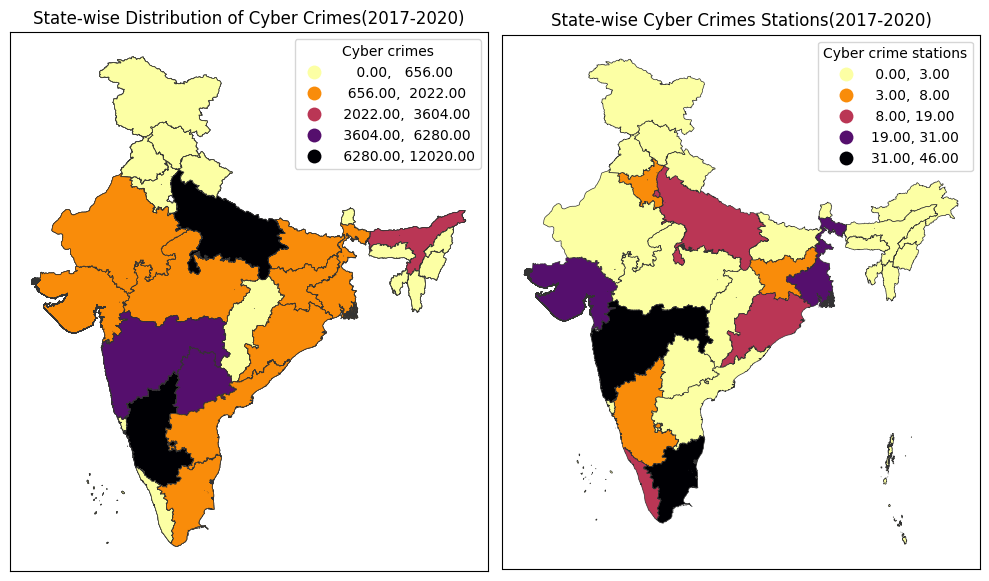

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ind_map2.plot(ax=ax1,column='total',legend=True,cmap='inferno_r',
          scheme='natural_breaks',k=5, edgecolor='0.2',linewidth=0.5)
leg1 = ax1.get_legend()
leg1.set_title('''Cyber crimes''')
ax1.set_title("State-wise Distribution of Cyber Crimes(2017-2020)")
ax1.set_xticks([])
ax1.set_yticks([])

ind_map4.plot(ax=ax2,column='Number of Cyber Crime Police Station (s)',legend=True,cmap='inferno_r',
          scheme='natural_breaks',k=5, edgecolor='0.2',linewidth=0.5)
ax2.title.set_text("State-wise Cyber Crimes Stations(2017-2020)")
leg1 = ax2.get_legend()
leg1.set_title('''Cyber crime stations''')
ax2.set_xticks([])
ax2.set_yticks([])


plt.tight_layout()

plt.show()

In [42]:
# From the above graph we can infer that the states with highest cyber crimes have less cyber crime stations. So there is a high chance in the cyber crimes to rise.

In [43]:
states.rename(columns= {'statename':'st_nm'}, inplace=True)

In [44]:
# USING FUZZYWUZZY
cyber_crime["best_match"] = cyber_crime["st_nm"].map(lambda x: process.extractOne(x,states["st_nm"])[0] )

In [45]:
cyber_crime = pd.merge(states, cyber_crime,left_on='st_nm', right_on='best_match',how='outer',indicator=True)

In [46]:
lil = cyber_crime.copy()
lil["geometry"] = lil["geometry"].centroid
cyber_crime_down_stations_up = states.query("st_nm =='GUJARAT'| st_nm == 'TAMIL NADU' | st_nm =='TELANGANA' | st_nm == 'WEST BENGAL'")

<ipython-input-46-108b39b1503d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lil["geometry"] = lil["geometry"].centroid


<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Cyber Crimes(bg) |Stations'}>

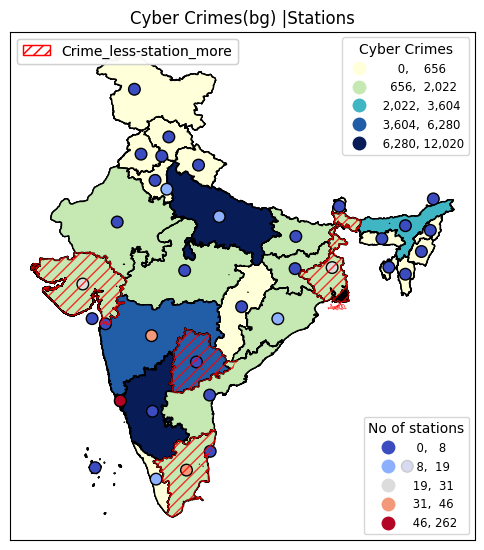

In [47]:
fig, ax = plt.subplots(1, figsize=(6,14))
ind_map2.plot(ax=ax,column='total',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Cyber Crimes''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
lil.plot(ax=ax,column='Number of Cyber Crime Police Station (s)',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 70)


ax.title.set_text("Cyber Crimes(bg) |Stations")

l2 = ax.get_legend()
l2.set_title('''Total''')

cyber_crime_down_stations_up.plot(ax=ax,edgecolor='red',linewidth=.5, facecolor="none",alpha=.8,hatch='///')
l1 = ax.get_legend()
l1.set_title('''No of stations''')


bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Crime_less-station_more')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

In [48]:
mor = cyber_crime.copy()
mor["geometry"] = mor["geometry"].centroid
cyber_crime_up_stations_down = states.query("st_nm =='UTTAR PRADESH'| st_nm == 'KARNATAKA'")

<ipython-input-48-ae64401b58cd>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mor["geometry"] = mor["geometry"].centroid


<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Cyber Crimes(bg) |Stations'}>

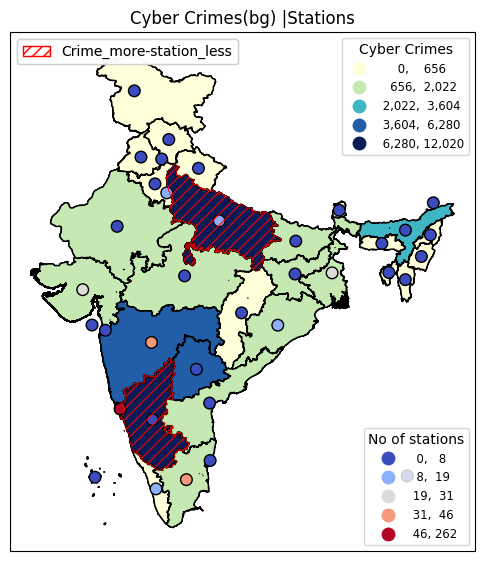

In [49]:
fig, ax = plt.subplots(1, figsize=(6,14))
ind_map2.plot(ax=ax,column='total',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l3 = ax.get_legend()
l3.set_title('''Cyber Crimes''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l3)
mor.plot(ax=ax,column='Number of Cyber Crime Police Station (s)',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 70)


ax.title.set_text("Cyber Crimes(bg) |Stations")

l4 = ax.get_legend()
l4.set_title('''Total''')

cyber_crime_up_stations_down.plot(ax=ax,edgecolor='red',linewidth=.5, facecolor="none",alpha=.8,hatch='///')
l3 = ax.get_legend()
l3.set_title('''No of stations''')


bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Crime_more-station_less')

l4=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l4)
ax.add_artist(l3)

#Internet Usage

In [50]:
internet_users = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/internet_users.xlsx')

In [51]:
internet_users.head(2)

,Sl. No.,Service Area,No. of Internet Subscribers per 100 Population
0,1,Andhra Pradesh,35.52
1,2,Assam,47.48


In [52]:
internet_users.rename(columns={"Service Area": "st_nm"}, inplace=True)

In [53]:
internet_users.head(2)

,Sl. No.,st_nm,No. of Internet Subscribers per 100 Population
0,1,Andhra Pradesh,35.52
1,2,Assam,47.48


In [54]:
ind_map5 = pd.merge(ind_state_gdf, internet_users, on='st_nm',how='outer',indicator=True)
ind_map5[['st_nm','_merge']]

ind_map6 = pd.merge(ind_state_gdf, internet_users, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,Andaman & Nicobar Island,left_only
1,Arunanchal Pradesh,both
2,Assam,both
3,Bihar,both
4,Chandigarh,left_only
5,Chhattisgarh,both
6,Dadara & Nagar Havelli,left_only
7,Daman & Diu,left_only
8,Goa,left_only
9,Gujarat,both


<Axes: >

[]

[]

Text(0.5, 1.0, 'Internet Users')

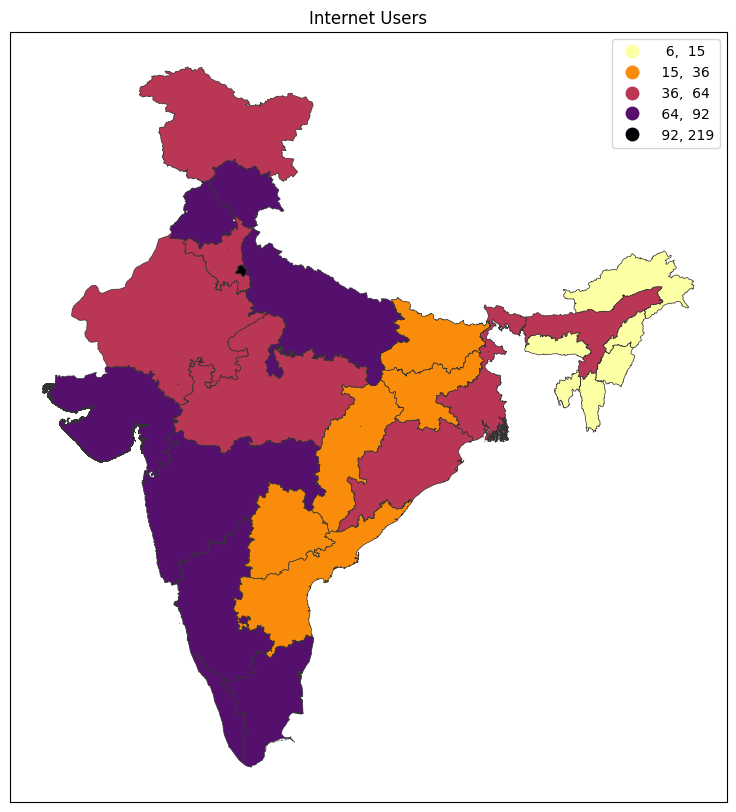

In [55]:
fig, ax = plt.subplots(figsize=(10,10))

ind_map6.plot(ax=ax,column='No. of Internet Subscribers per 100 Population',legend=True,cmap='inferno_r',
          scheme='natural_breaks',k=5, edgecolor='0.2',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Internet Users')


#Internet usage and Cyber Crimes

<Axes: >

Text(0.5, 1.0, 'State-wise Distribution of Cyber Crimes(2017-2020)')

[]

[]

<Axes: >

[]

[]

Text(0.5, 1.0, 'Internet Users')

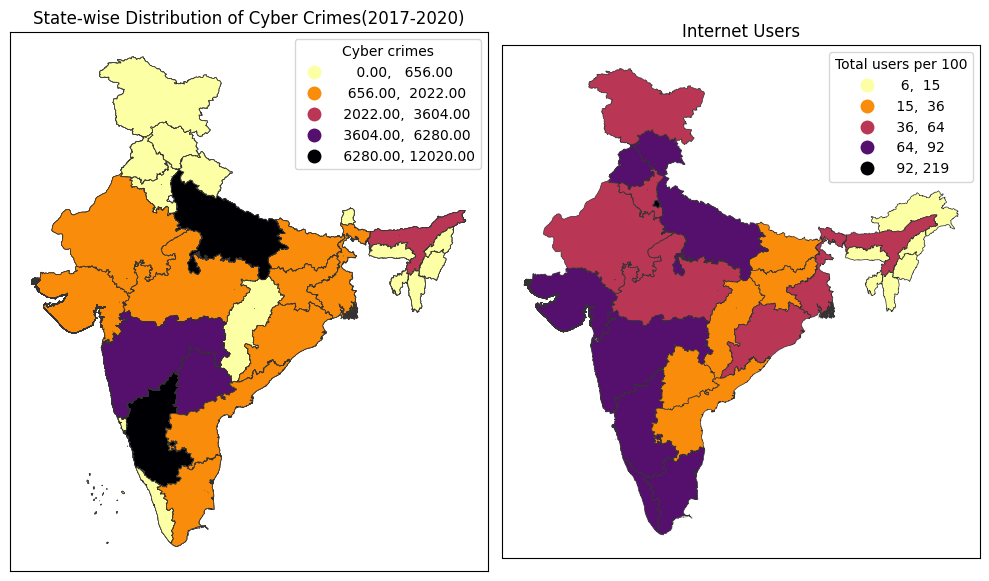

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ind_map2.plot(ax=ax1,column='total',legend=True,cmap='inferno_r',
          scheme='natural_breaks',k=5, edgecolor='0.2',linewidth=0.5)
leg1 = ax1.get_legend()
leg1.set_title('''Cyber crimes''')
ax1.set_title("State-wise Distribution of Cyber Crimes(2017-2020)")
ax1.set_xticks([])
ax1.set_yticks([])

ind_map6.plot(ax=ax2,column='No. of Internet Subscribers per 100 Population',legend=True,cmap='inferno_r',
          scheme='natural_breaks',k=5, edgecolor='0.2',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})
leg2 = ax2.get_legend()
leg2.set_title('''Total users per 100''')
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax2.set_title('Internet Users')

plt.tight_layout()

plt.show()

In [57]:
# As we can see from the graph that the states with high cyber crimes have high internet usage hence resulting in high cyber crimes.

# Unemployment

In [58]:
ind_unemploy = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/Unemployment_Rate_upto_11_2020.xlsx')

In [59]:
ind_unemploy.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [60]:
ind_unemploy.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [61]:
ind_unemploy.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [63]:
import datetime as dt
# Renaming columns for better clarity
ind_unemploy.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
ind_unemploy['Date'] = pd.to_datetime(ind_unemploy['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
ind_unemploy['Frequency'] = ind_unemploy['Frequency'].astype('category')
ind_unemploy['Region'] = ind_unemploy['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
ind_unemploy['Month'] = ind_unemploy['Date'].dt.month

# Converting 'Month' to integer format
ind_unemploy['Month_int'] = ind_unemploy['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
ind_unemploy['Month_name'] = ind_unemploy['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
ind_unemploy.drop(columns='Month', inplace=True)

In [64]:
ind_unemploy.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [65]:
unemploy_stat = ind_unemploy[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
print(round(unemploy_stat.describe().T, 2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [66]:
region_stats = ind_unemploy.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed',
                                       'Estimated Labour Participation Rate']].mean().reset_index()
print(round(region_stats, 2))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


In [67]:
import plotly.express as px
fig = px.box(ind_unemploy, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

In [68]:
fig = px.scatter_matrix(ind_unemploy,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                                          'Estimated Labour Participation Rate'],color='Region')
fig.show()

In [69]:
plot_unemp = ind_unemploy[['Estimated Unemployment Rate','States']]
ind_unemploy_unemployed = plot_unemp.groupby('States').mean().reset_index()

ind_unemploy_unemployed = ind_unemploy_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(ind_unemploy_unemployed, x='States',y='Estimated Unemployment Rate',color = 'States',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [70]:
ind_unemploy.Region.unique()

['South', 'Northeast', 'East', 'West', 'North']
Categories (5, object): ['East', 'North', 'Northeast', 'South', 'West']

In [71]:
Region = ind_unemploy.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()
Region = pd.DataFrame(Region).reset_index()

In [72]:
# Average Unemployment Rate

fig = px.bar(Region,x='Region',y='Estimated Unemployment Rate',color='Region',title='Average unemployment rate(regionwise)')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
#fig.show()

In [73]:
fig = px.scatter_geo(ind_unemploy,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

# Suicide

In [74]:
suicide = pd.read_excel('https://github.com/Thanvitha/gis/raw/main/Suicides%20in%20India%202001-2012.xlsx')

In [75]:
suicide.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [76]:
# rename states

suicide.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
suicide.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
suicide.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
suicide.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
suicide.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
suicide.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [77]:
# rename Type

suicide.replace('Bankruptcy or Sudden change in Economic',
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
suicide.replace('By Other means (please specify)', 'By Other means', inplace=True)
suicide.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [79]:
suicide.rename(columns= {'State':'st_nm'}, inplace=True)

In [80]:
suicide = suicide.drop(suicide[(suicide.st_nm == 'Total (Uts)') | (suicide.st_nm == 'Total (All India)') |
               (suicide.st_nm == 'Total (States)')].index)

In [81]:
suicide=suicide.drop(suicide[(suicide.Type =='By Other means')|(suicide.Type=='Other Causes (Please Specity)')|
                    (suicide.Type=='Others (Please Specify)')|(suicide.Type=='Causes Not known')].index)

In [82]:
suicide = suicide.drop(suicide[suicide.Total==0].index)

In [83]:
temp_state = suicide.groupby('st_nm').count()['Total'].reset_index().sort_values(by='Total',ascending=False)
temp_state.style.background_gradient(cmap='Reds')

,st_nm,Total
1,Andhra Pradesh,4586
16,Karnataka,4515
30,Tamil Nadu,4477
20,Maharashtra,4435
19,Madhya Pradesh,4429
32,Uttar Pradesh,4364
11,Gujarat,4267
34,West Bengal,4049
17,Kerala,3939
6,Chhattisgarh,3771


Female    39444
Male      47132
Name: Gender, dtype: int64


<Axes: title={'center': 'Gender Count'}, ylabel='Gender'>

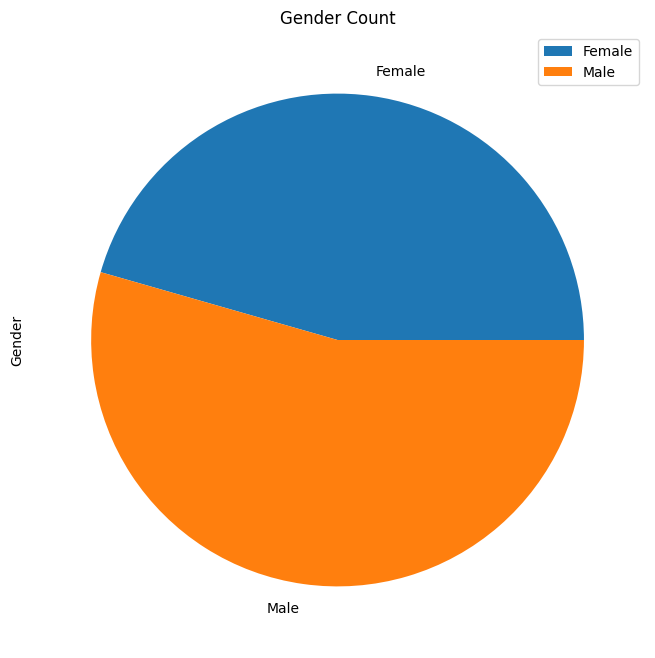

In [84]:
counts = suicide['Gender'].value_counts().sort_index()
print(counts)
# Plot a pie chart
counts.plot(kind='pie', title='Gender Count',figsize=(10,8))

plt.legend()
plt.show()

In [85]:
# splitting data as per the type code

cause = suicide[suicide['Type_code'] == 'Causes']
edu_status = suicide[suicide['Type_code'] == 'Education_Status']

In [86]:
def plot_type(suicide, Title, X_lab):
    p_type = suicide.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2')

<ipython-input-86-b7ab0f55e45f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



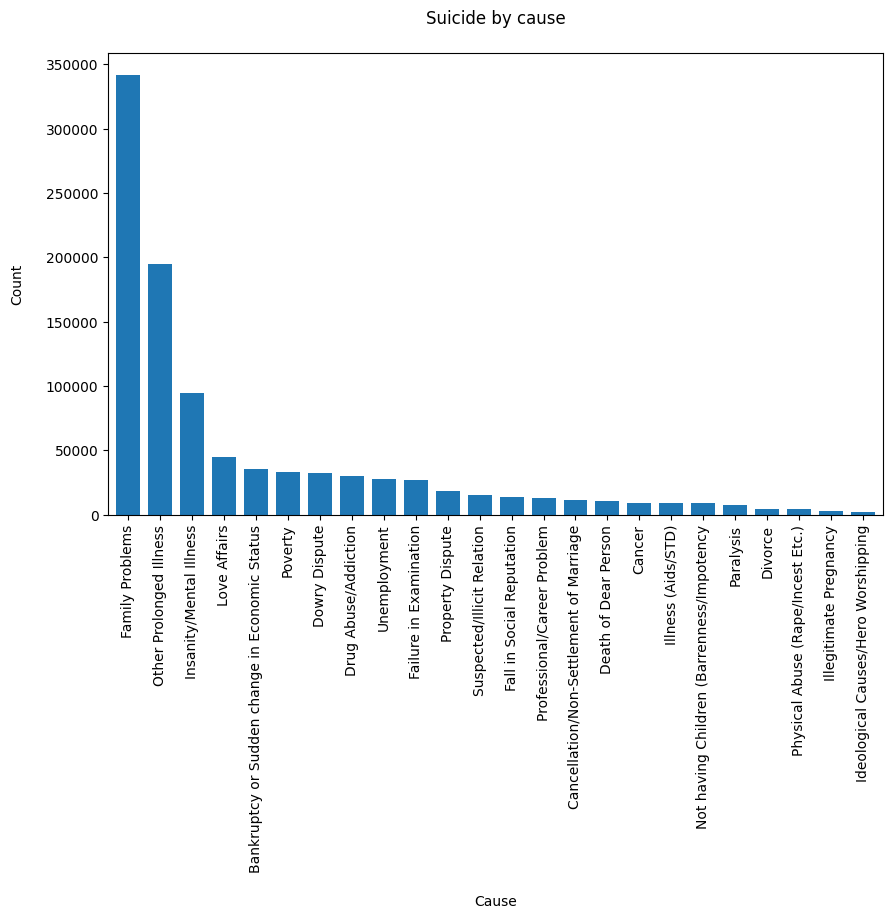

In [87]:
plot_type(cause, 'Suicide by cause', 'Cause')

<ipython-input-86-b7ab0f55e45f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



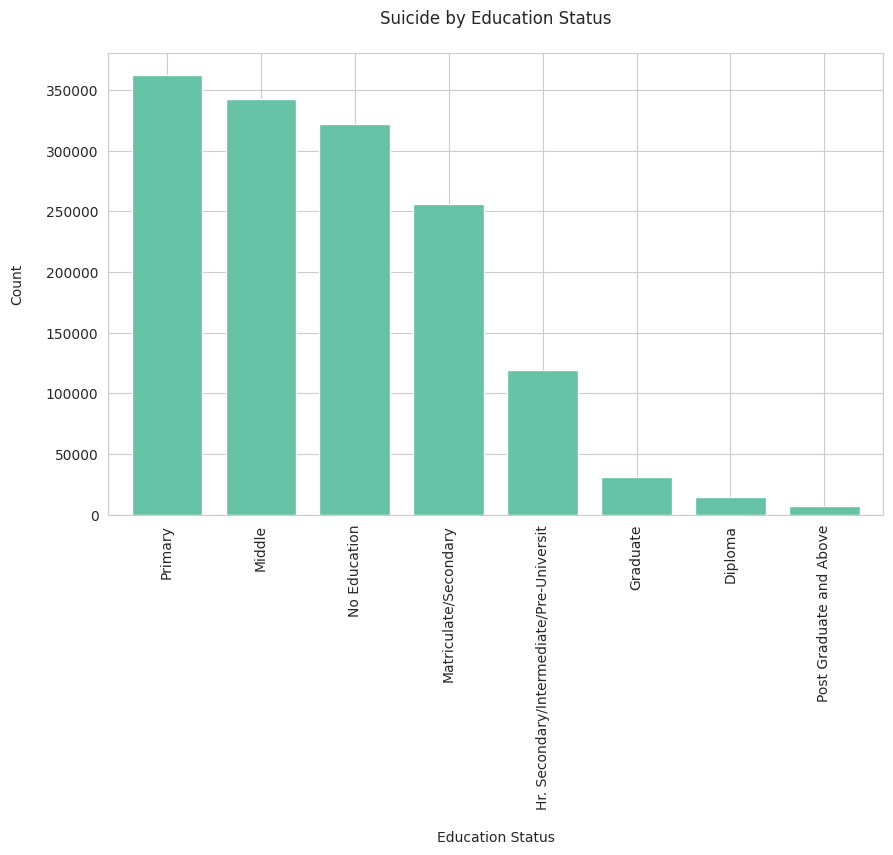

In [88]:
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

In [89]:
# As the data contains 80000 rows, it is difficult to plot for all the years. S o here i am considering for the year 2013.

In [90]:
suicide_rate= pd.read_excel('https://github.com/Thanvitha/gis/raw/main/suicide_2013.xlsx')

In [91]:
suicide_rate.head(25)

,STATE/UT,Year,CAUSE,Male,Female,Total
0,ANDHRA PRADESH,2013,Never Married,1543,748,2291
1,ANDHRA PRADESH,2013,Married,7707,3382,11089
2,ANDHRA PRADESH,2013,Widowed/Widower,289,307,596
3,ANDHRA PRADESH,2013,Divorcee,114,148,262
4,ANDHRA PRADESH,2013,Seperated,249,120,369
5,ANDHRA PRADESH,2013,Total,9902,4705,14607
6,ARUNACHAL PRADESH,2013,Never Married,44,21,65
7,ARUNACHAL PRADESH,2013,Married,119,37,156
8,ARUNACHAL PRADESH,2013,Widowed/Widower,6,0,6
9,ARUNACHAL PRADESH,2013,Divorcee,2,0,2


In [92]:
values_to_drop = ['Total (All India)', 'Total (States)', 'Total (UTs)','No Education','Status not known','Total','Professionals (MBA; etc.)','Graduate and above']
filtered_df = suicide_rate.copy()
filtered_df.drop(filtered_df[filtered_df['CAUSE'].str.contains('|'.join(values_to_drop))].index, inplace=True)
filtered_df.drop(filtered_df[filtered_df['CAUSE'] == 'Professionals (MBA; etc.)'].index, inplace=True)

<ipython-input-92-c788efd441df>:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [93]:
columns_to_drop = ['Year', 'CAUSE', 'Male', 'Female']
filtered_df.drop(columns=columns_to_drop, inplace=True)

In [94]:
suicide_new = filtered_df.groupby('STATE/UT').sum().reset_index()

In [95]:
values_to_drop = ['TOTAL(ALL INDIA)','TOTAL(STATES)','TOTAL(UTs)']
suicide_new = suicide_new[~suicide_new['STATE/UT'].isin(values_to_drop)]

In [96]:
suicide_new["best_match"] = suicide_new["STATE/UT"].map(lambda x: process.extractOne(x,states["st_nm"])[0])
suicide_unemp = pd.merge(states, suicide_new,left_on='st_nm', right_on='best_match',how='outer',indicator=True)

<Axes: >

[]

[]

<Axes: >

[]

[]

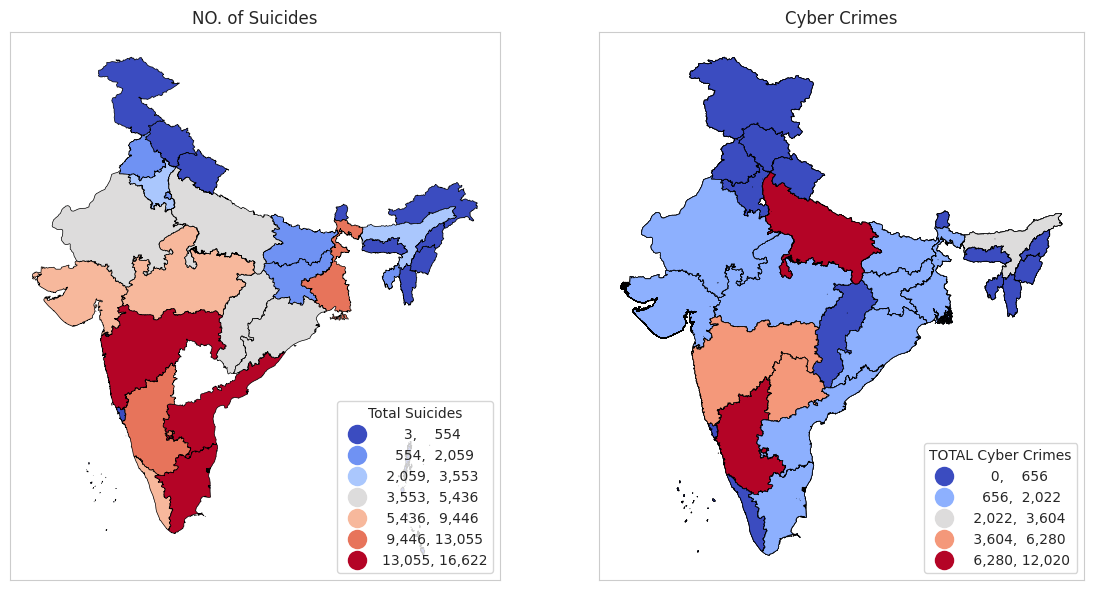

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

suicide_unemp.plot(ax=ax1,column='Total',legend=True,cmap='coolwarm',scheme='natural_breaks',k=7, edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax1.get_legend()
leg1.set_title('''Total Suicides''')
ax1.title.set_text("NO. of Suicides")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks

ind_map2.plot(ax=ax2,column='total',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax2.get_legend()
leg1.set_title('''TOTAL Cyber Crimes''')
ax2.title.set_text("Cyber Crimes")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks

plt.tight_layout()

plt.show()

#Scatter Plots

Text(0.5, 0.98, 'Relationship Between Cyber crimes and Internet Users')

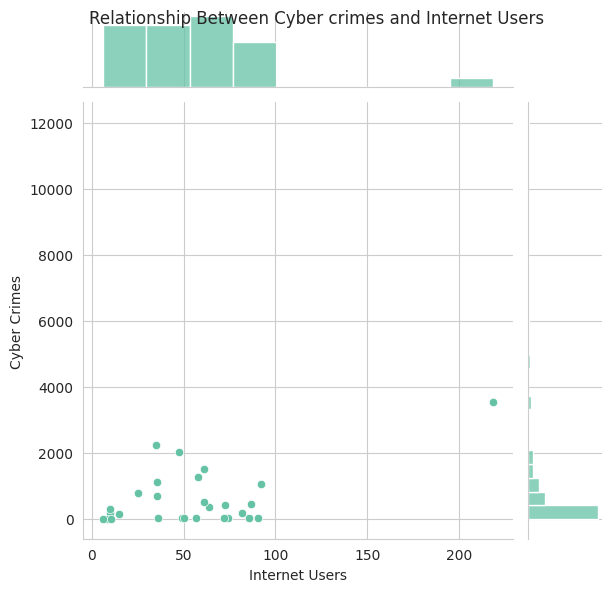

In [102]:
plot = sns.jointplot(y=ind_map2["total"], x=internet_users['No. of Internet Subscribers per 100 Population'])
plot.set_axis_labels(xlabel="Internet Users", ylabel="Cyber Crimes")
plot.fig.suptitle("Relationship Between Cyber crimes and Internet Users")
sns.set_style("whitegrid")
plt.show()

Text(0.5, 0.98, 'Relationship Between Cyber crimes and Suicides')

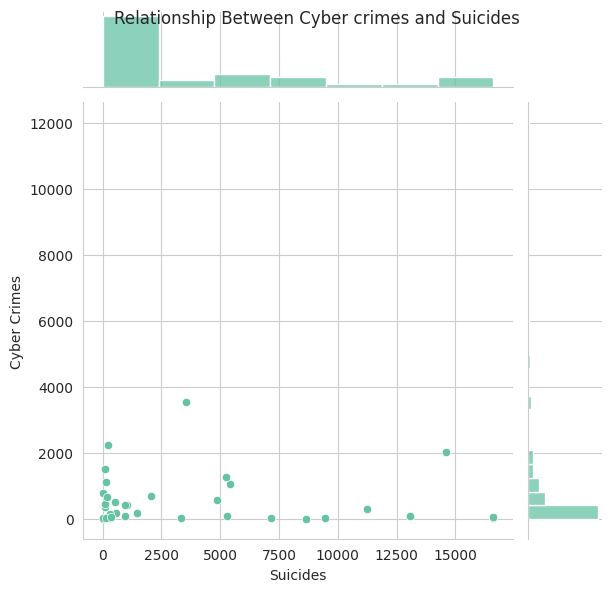

In [103]:
plot = sns.jointplot(y=ind_map2["total"], x=suicide_unemp['Total'])
plot.set_axis_labels(xlabel="Suicides", ylabel="Cyber Crimes")
plot.fig.suptitle("Relationship Between Cyber crimes and Suicides")
sns.set_style("whitegrid")
plt.show()